In [68]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn import metrics
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_pickle("train_dataset")
test_df = pd.read_pickle("test_dataset")
val_df = pd.read_pickle("val_dataset")

## Label to category encoding



#### 0 == deliberation


#### 1 == imaginative entry


#### 2 == other


#### 3 == procedure


#### 4 == seminar


#### 5 == social


#### 6 == UX

In [11]:
train_df[:20]

,text,label
0,What do you guys think?,4
1,Yay you got it!,5
2,I like it. It draws from the story.,4
3,Any idea on how to submit it?,6
4,It would be just a thing that this King would ...,4
5,Yes!! Well done.,0
6,...,4
7,"So regarding part 1 of the question, I think t...",4
8,I believe that is all the survey and canvas yes,3
9,I think the King would offer her the same choi...,4


### using the same dataset as used for BERT

In [16]:
X_train = train_df['text']
X_test = test_df['text']
X_val = val_df['text'] 

y_train = train_df['label']
y_test = test_df['label']
y_val = val_df['label']

In [17]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_val = vectorizer.transform(X_val)
print("Training samples: %d, training features: %d" % X_train.shape)
print("Testing samples: %d, Testing features: %d" % X_test.shape)
print("Validation samples: %d, Validation features: %d" % X_val.shape)

Training samples: 427, training features: 1353
Testing samples: 92, Testing features: 1353
Validation samples: 92, Validation features: 1353


### MultinomialNB

Training ...
Testing ...
Classification accuracy:   0.739
Classification report:
              precision    recall  f1-score   support

           0       0.43      0.25      0.32        12
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.33      0.50      0.40         4
           4       0.81      0.96      0.88        54
           5       0.75      0.75      0.75        12
           6       0.67      0.40      0.50         5

    accuracy                           0.74        92
   macro avg       0.43      0.41      0.41        92
weighted avg       0.68      0.74      0.70        92

Confusion matrix:
[[ 3  0  0  3  5  1  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 1  0  0  2  1  0  0]
 [ 1  0  0  0 52  1  0]
 [ 1  0  0  0  1  9  1]
 [ 1  0  0  1  0  1  2]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

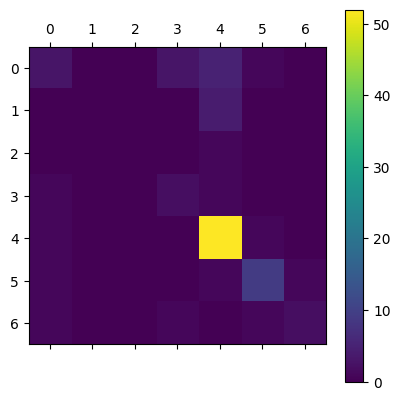

In [20]:
# Training and testing a Multinomial naive Bayes
clf = MultinomialNB(alpha=.01)

print("Training ...")
clf.fit(X_train, y_train)

print("Testing ...")
pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_test, pred))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

Testing ...
Classification accuracy:   0.707
Classification report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       1.00      0.25      0.40         4
           3       0.75      0.50      0.60         6
           4       0.77      0.94      0.85        54
           5       0.80      0.44      0.57         9
           6       0.33      0.22      0.27         9

    accuracy                           0.71        92
   macro avg       0.68      0.46      0.51        92
weighted avg       0.70      0.71      0.68        92

Confusion matrix:
[[ 4  0  0  5  0  1]
 [ 0  1  0  3  0  0]
 [ 2  0  3  1  0  0]
 [ 1  0  0 51  1  1]
 [ 0  0  0  3  4  2]
 [ 3  0  1  3  0  2]]


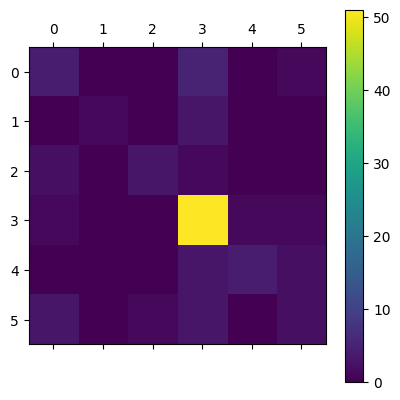

In [21]:
print("Testing ...")
pred_val = clf.predict(X_val)

score = metrics.accuracy_score(y_val, pred_val)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_val, pred_val))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_val, pred_val)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

### Analysis of errors: find which examples are misclassified 
Compare the pred and y_test, save combined dataframe to pickle file

In [22]:
err_df = pd.DataFrame()

In [23]:
pred

array([0, 0, 4, 5, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4,
       5, 4, 4, 3, 4, 4, 4, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 5, 4, 3, 0, 4, 0, 5, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 3, 4, 6, 5, 3, 3, 4, 4, 5, 4, 5, 4, 4, 4, 0, 4,
       4, 4, 4, 4])

In [25]:
y_test

0     3
1     4
2     4
3     0
4     4
     ..
87    4
88    4
89    4
90    4
91    4
Name: label, Length: 92, dtype: int32

In [24]:
pred_val

array([5, 0, 4, 6, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 5, 6, 4, 4, 4, 4, 3, 4, 4, 0, 0, 4, 4, 0, 4,
       4, 0, 5, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 6, 6, 4, 4, 6, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 4, 4, 4, 0, 4, 4, 4, 3, 5, 4, 4, 4,
       4, 0, 4, 4])

In [26]:
y_val

0     5
1     3
2     4
3     4
4     5
     ..
87    4
88    1
89    0
90    0
91    6
Name: label, Length: 92, dtype: int32

In [28]:
ground_truth = np.concatenate((y_test, y_val))
predicted = np.concatenate((pred, pred_val))

In [29]:
ground_truth

array([3, 4, 4, 0, 4, 4, 4, 4, 1, 0, 4, 4, 4, 4, 5, 0, 4, 4, 4, 4, 5, 4,
       5, 4, 4, 3, 4, 4, 0, 0, 0, 4, 4, 4, 4, 2, 4, 4, 3, 0, 6, 1, 5, 4,
       4, 0, 4, 4, 4, 6, 4, 4, 4, 4, 5, 4, 0, 5, 4, 0, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 5, 3, 1, 5, 5, 0, 6, 4, 1, 5, 0, 5, 4, 4, 4, 6, 4,
       4, 4, 4, 4, 5, 3, 4, 4, 5, 1, 4, 3, 4, 4, 4, 4, 6, 0, 4, 6, 4, 4,
       4, 4, 4, 4, 4, 5, 0, 4, 4, 3, 4, 5, 6, 4, 4, 4, 4, 3, 0, 4, 4, 6,
       4, 0, 0, 3, 4, 6, 5, 6, 6, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 5, 5,
       4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 5, 1, 5, 4, 4, 1, 0, 4, 4, 4, 3,
       4, 4, 4, 4, 1, 0, 0, 6])

In [30]:
predicted

array([0, 0, 4, 5, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4,
       5, 4, 4, 3, 4, 4, 4, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 5, 4, 3, 0, 4, 0, 5, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 3, 4, 6, 5, 3, 3, 4, 4, 5, 4, 5, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 5, 0, 4, 6, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 5, 6, 4, 4, 4, 4, 3, 4, 4, 0, 0,
       4, 4, 0, 4, 4, 0, 5, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 6, 6,
       4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 4, 4, 4, 0, 4, 4, 4, 3,
       5, 4, 4, 4, 4, 0, 4, 4])

In [31]:
err_df['ground_truth'] = ground_truth

In [32]:
err_df['predicted'] = predicted

In [36]:
text = np.concatenate((test_df['text'], val_df['text']))

In [38]:
err_df['text'] = text

In [39]:
err_df

,ground_truth,predicted,text
0,3,0,I just asked Samantha if this activity is time...
1,4,0,That's what I thought to or how I interpreted ...
2,4,4,Hey Ashley Peterson! I also wanted to mention ...
3,0,5,Yes I found this by luck...LOL!
4,4,4,"Ana, I agree with you that the king is so adam..."
...,...,...,...
179,4,4,The Lady was behind the door.
180,1,4,"Not what do you think she would do, but what w..."
181,0,0,ok
182,0,4,Live without was the first one I put. Then Tr...


In [40]:
err_df.to_pickle("MultinomialNB_alpha_0.01")

### Random Forest Classifier

In [44]:
"""

model_name = "CHANGE_THIS" ## needs to be changed!!!

err_df = pd.DataFrame()

ground_truth = np.concatenate((y_test, y_val))
predicted = np.concatenate((pred, pred_val))

err_df['ground_truth'] = ground_truth
err_df['predicted'] = predicted

text = np.concatenate((test_df['text'], val_df['text']))

err_df['text'] = text

err_df.to_pickle(model_name)

print(f"Successfully stored error data for model {model_name}")

"""

'\n\nmodel_name = "CHANGE_THIS" ## needs to be changed!!!\n\nerr_df = pd.DataFrame()\n\nground_truth = np.concatenate((y_test, y_val))\npredicted = np.concatenate((pred, pred_val))\n\nerr_df[\'ground_truth\'] = ground_truth\nerr_df[\'predicted\'] = predicted\n\ntext = np.concatenate((test_df[\'text\'], val_df[\'text\']))\n\nerr_df[\'text\'] = text\n\nerr_df.to_pickle(model_name)\n\nprint(f"Successfully stored error data for model {model_name}")\n\n'

Training ...
Testing ...
Classification accuracy:   0.685
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.69      0.98      0.81        54
           5       0.83      0.42      0.56        12
           6       0.00      0.00      0.00         5

    accuracy                           0.68        92
   macro avg       0.32      0.26      0.27        92
weighted avg       0.61      0.68      0.62        92

Confusion matrix:
[[ 5  0  0  1  6  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 1  0  0  0  3  0  0]
 [ 0  0  0  0 53  1  0]
 [ 1  0  0  1  5  5  0]
 [ 0  0  0  0  5  0  0]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

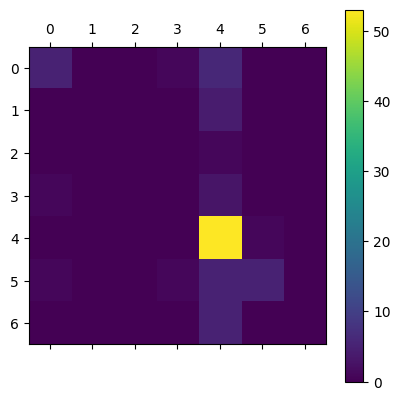

In [58]:

clf = RandomForestClassifier(bootstrap = False, n_estimators = 150, n_jobs=-1, max_depth=30,  min_samples_split=2, min_samples_leaf=1)


print("Training ...")
clf.fit(X_train, y_train)

print("Testing ...")
pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_test, pred))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

Validating ...
Classification accuracy:   0.641
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33        10
           1       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         6
           4       0.70      0.91      0.79        54
           5       0.60      0.33      0.43         9
           6       1.00      0.22      0.36         9

    accuracy                           0.64        92
   macro avg       0.60      0.35      0.39        92
weighted avg       0.64      0.64      0.60        92

Confusion matrix:
[[ 4  0  0  6  0  0]
 [ 1  1  0  2  0  0]
 [ 1  0  0  4  1  0]
 [ 4  0  0 49  1  0]
 [ 1  0  0  5  3  0]
 [ 3  0  0  4  0  2]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

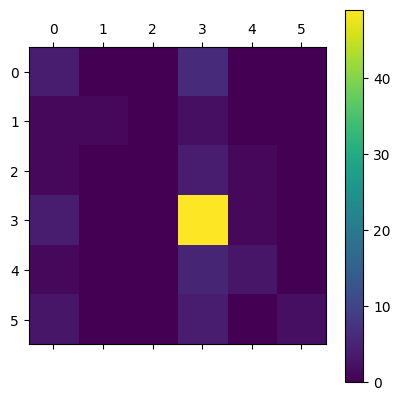

In [59]:
print("Validating ...")
pred_val = clf.predict(X_val)

score = metrics.accuracy_score(y_val, pred_val)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_val, pred_val))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_val, pred_val)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

In [60]:
model_name = "RandomForest_150_estimators_30_max_depth" ## needs to be changed!!!

err_df = pd.DataFrame()

ground_truth = np.concatenate((y_test, y_val))
predicted = np.concatenate((pred, pred_val))

err_df['ground_truth'] = ground_truth
err_df['predicted'] = predicted

text = np.concatenate((test_df['text'], val_df['text']))

err_df['text'] = text

err_df.to_pickle(model_name)

print(f"Successfully stored error data for model {model_name}")

Successfully stored error data for model RandomForest_150_estimators_30_max_depth


## SVM

Training ...
Testing ...
Classification accuracy:   0.739
Classification report:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.50      0.25      0.33         4
           4       0.76      1.00      0.86        54
           5       0.80      0.67      0.73        12
           6       0.00      0.00      0.00         5

    accuracy                           0.74        92
   macro avg       0.37      0.33      0.34        92
weighted avg       0.64      0.74      0.68        92

Confusion matrix:
[[ 5  0  0  1  5  1  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 2  0  0  1  1  0  0]
 [ 0  0  0  0 54  0  0]
 [ 1  0  0  0  3  8  0]
 [ 1  0  0  0  3  1  0]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

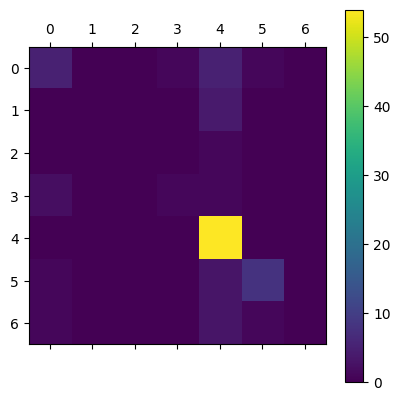

In [64]:

clf = svm.SVC(kernel='sigmoid')


print("Training ...")
clf.fit(X_train, y_train)

print("Testing ...")
pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_test, pred))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

Validating ...
Classification accuracy:   0.641
Classification report:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.00      0.00      0.00         4
           3       1.00      0.17      0.29         6
           4       0.69      0.94      0.80        54
           5       0.75      0.33      0.46         9
           6       0.33      0.11      0.17         9

    accuracy                           0.64        92
   macro avg       0.51      0.31      0.34        92
weighted avg       0.61      0.64      0.58        92

Confusion matrix:
[[ 3  0  0  6  0  1]
 [ 1  0  0  3  0  0]
 [ 1  0  1  3  1  0]
 [ 2  0  0 51  0  1]
 [ 1  0  0  5  3  0]
 [ 2  0  0  6  0  1]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

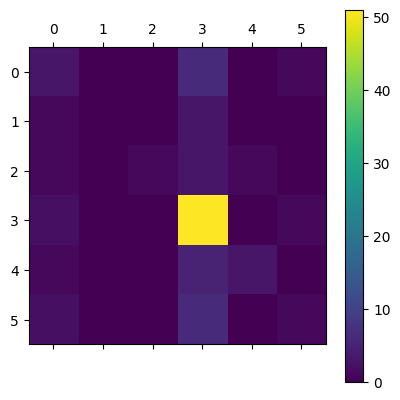

In [65]:
print("Validating ...")
pred_val = clf.predict(X_val)

score = metrics.accuracy_score(y_val, pred_val)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_val, pred_val))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_val, pred_val)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

In [66]:
model_name = "SVM_SVC_sigmoid_kernel" ## needs to be changed!!!

err_df = pd.DataFrame()

ground_truth = np.concatenate((y_test, y_val))
predicted = np.concatenate((pred, pred_val))

err_df['ground_truth'] = ground_truth
err_df['predicted'] = predicted

text = np.concatenate((test_df['text'], val_df['text']))

err_df['text'] = text

err_df.to_pickle(model_name)

print(f"Successfully stored error data for model {model_name}")

Successfully stored error data for model SVM_SVC_sigmoid_kernel


## XGBoost

In [69]:
params = {
    'max_depth': 8,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 7,
    # Set number of GPUs if available   
    'tree_method': 'gpu_hist',
    'gpu_id': 0
}

In [70]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
dval = xgb.DMatrix(data=X_val)

In [72]:
t = time()
bst = xgb.train(params, dtrain)

training_time = time() - t
print("train time: %0.3fs" % training_time)


t = time()
pred = bst.predict(dtest)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

train time: 2.303s
test time:  0.002s


Classification accuracy:   0.641
Classification report:
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.68      0.96      0.80        54
           5       0.75      0.25      0.38        12
           6       0.00      0.00      0.00         5

    accuracy                           0.64        92
   macro avg       0.27      0.22      0.22        92
weighted avg       0.56      0.64      0.57        92

Confusion matrix:
[[ 4  0  0  0  8  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 1  0  0  0  3  0  0]
 [ 0  1  0  0 52  1  0]
 [ 2  0  0  1  5  3  1]
 [ 2  0  0  0  3  0  0]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

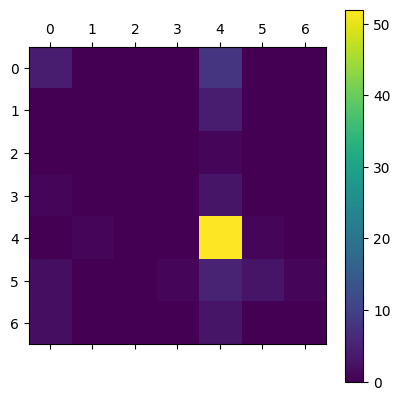

In [73]:

score = metrics.accuracy_score(y_test, pred)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_test, pred))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

In [76]:
pred_val = bst.predict(dval)

Validating ...
Classification accuracy:   0.641
Classification report:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.00      0.00      0.00         4
           3       1.00      0.17      0.29         6
           4       0.69      0.94      0.80        54
           5       0.75      0.33      0.46         9
           6       0.33      0.11      0.17         9

    accuracy                           0.64        92
   macro avg       0.51      0.31      0.34        92
weighted avg       0.61      0.64      0.58        92

Confusion matrix:
[[ 3  0  0  6  0  1]
 [ 1  0  0  3  0  0]
 [ 1  0  1  3  1  0]
 [ 2  0  0 51  0  1]
 [ 1  0  0  5  3  0]
 [ 2  0  0  6  0  1]]


C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ana\Desktop\local playground NLP\nlp\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

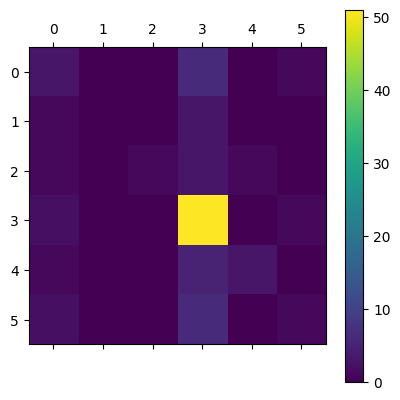

In [77]:
print("Validating ...")
pred_val = clf.predict(X_val)

score = metrics.accuracy_score(y_val, pred_val)
print("Classification accuracy:   %0.3f" % score)

print("Classification report:")
print(metrics.classification_report(y_val, pred_val))

# Show confusion matrix
print("Confusion matrix:")
cm = metrics.confusion_matrix(y_val, pred_val)
print(cm)
plt.matshow(cm)
plt.colorbar()

plt.show()

In [78]:
model_name = "XGBoost" ## needs to be changed!!!

err_df = pd.DataFrame()

ground_truth = np.concatenate((y_test, y_val))
predicted = np.concatenate((pred, pred_val))

err_df['ground_truth'] = ground_truth
err_df['predicted'] = predicted

text = np.concatenate((test_df['text'], val_df['text']))

err_df['text'] = text

err_df.to_pickle(model_name)

print(f"Successfully stored error data for model {model_name}")

Successfully stored error data for model XGBoost
